# **Classification of Celestial Objects: Stars, Galaxies, and Quasars**




### About the SDSS

The Sloan Digital Sky Survey is a project which offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone who is interested.

For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048x2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.

The telescope covers around one quarter of the earth's sky - therefore focuses on the northern part of the sky.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12

plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rcParams['figure.dpi']=150

### Feature Description

#### View "PhotoObj"
* objid = Object Identifier
* ra = J2000 Right Ascension (r-band)
* dec = J2000 Declination (r-band)

Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit

The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.


* run = Run Number
* rereun = Rerun Number
* camcol = Camera column
* field = Field number

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:
- **run** number, which identifies the specific scan,
- the camera column, or "**camcol**," a number from 1 to 6, identifying the scanline within the run, and
- the **field** number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs.
- An additional number, **rerun**, specifies how the image was processed.

#### View "SpecObj"

* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object)

The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift
* plate = plate number
* mjd = MJD of observation
* fiberid = fiber ID

In physics, **redshift** happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.

Each spectroscopic exposure employs a large, thin, circular metal **plate** that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.

**Modified Julian Date**, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.

The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding **fiberID**.

### Load Data

In [ ]:
sdss_df = pd.read_csv('/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [ ]:
sdss_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


## Data Exploration

In [ ]:
sdss_df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [ ]:
sdss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


The dataset has 10000 examples, 17 feature columns and 1 target column. 8 of the 17 features are 64 bit integers, 1 feature is an unsigned 64 bit integer, 8 are 64 bit floats and the target column is of the type object.

In [ ]:
sdss_df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


From the above table we can tell that are no missing values at all. This means: **no imputing!**

We also notice that most of the features stay within a reasonable scale when comparing values within **only one** column. We can recognize this from the min, max and quartil rows.

In [ ]:
sdss_df['class'].value_counts()

,count
class,
GALAXY,4998
STAR,4152
QSO,850


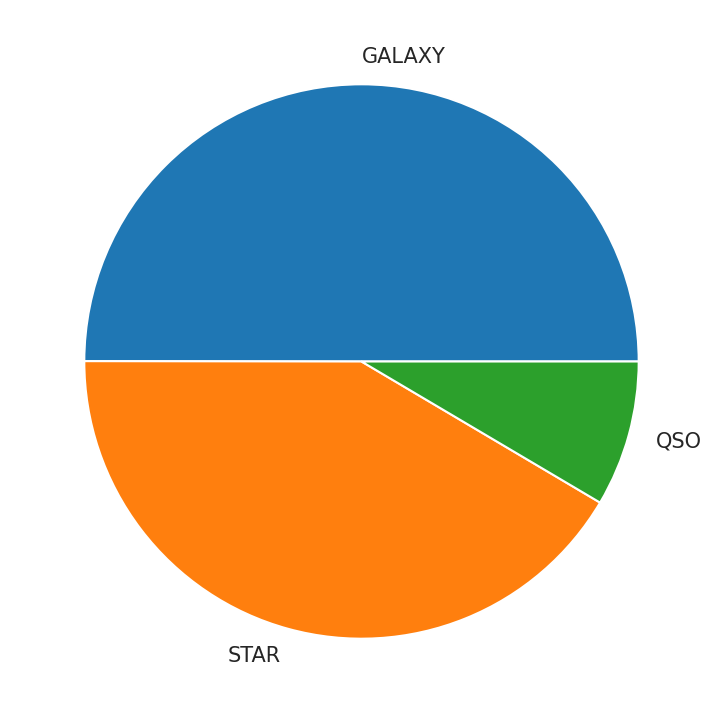

In [ ]:
plt.figure(figsize=(15, 6))
plt.pie(sdss_df['class'].value_counts(), labels=sdss_df['class'].value_counts().index.values);

The most objects (50%) are galaxies, a little less (40%) are stars and only around (10%) of the rows are classified as QSOs.

### First Data Filtering

In [ ]:
sdss_df.columns.values

array(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun',
       'camcol', 'field', 'specobjid', 'class', 'redshift', 'plate',
       'mjd', 'fiberid'], dtype=object)

The features 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation, e.g. 'run' represents the corresponding scan which captured the oject.

In [ ]:
sdss_df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

In [ ]:
sdss_df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


### Univariate Analysis

#### Redshift

To start the univariate analysis we will plot histograms for the 'redshift' feature column for each class.

This will tell us how the redshift values are distributed over their range.

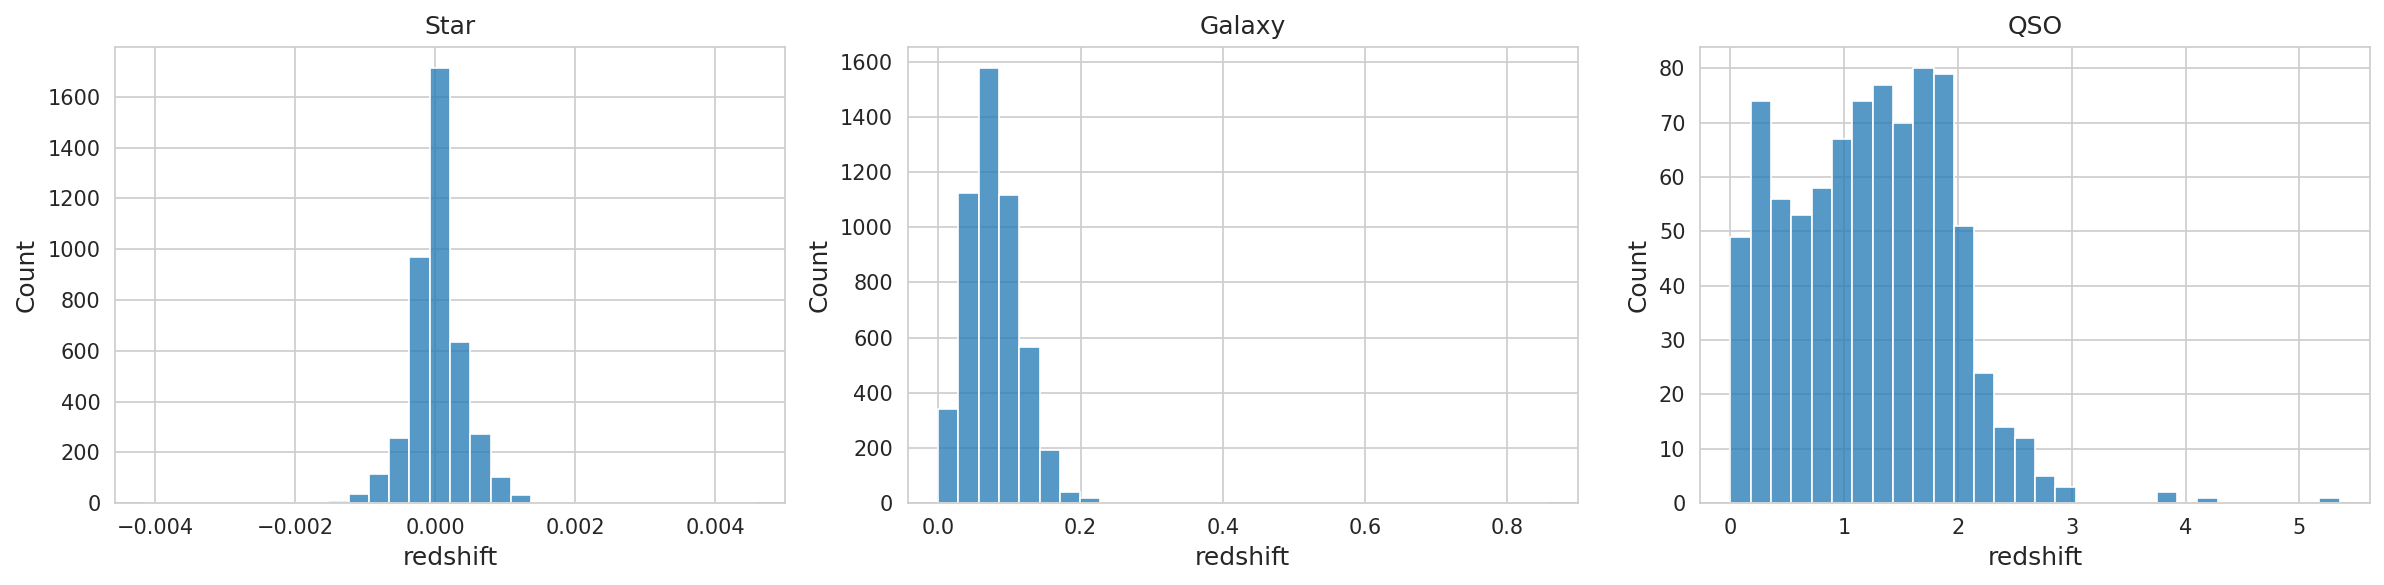

In [ ]:
ig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Plot for Stars
sns.histplot(sdss_df[sdss_df['class'] == 'STAR'].redshift, bins=30, ax=axes[0], kde=False)
axes[0].set_title('Star')

# Plot for Galaxies
sns.histplot(sdss_df[sdss_df['class'] == 'GALAXY'].redshift, bins=30, ax=axes[1], kde=False)
axes[1].set_title('Galaxy')

# Plot for QSOs
sns.histplot(sdss_df[sdss_df['class'] == 'QSO'].redshift, bins=30, ax=axes[2], kde=False)
axes[2].set_title('QSO')

plt.tight_layout()
plt.show()

This is an interesting result.

We can cleary tell that the redshift values for the classes quite differ.

* **Star:** The histogram looks like a truncated zero-centered normal distribution.

* **Galaxy:** The redshift values may come from a slightly right-shifted normal distribution which is centered around 0.075.

* **QSO:** The redshift values for QSOs are a lot more uniformly distributed than for Stars or Galaxies. They are roughly evenly distributed from 0 to 3, than the occurences decrease drastically. For 4 oder ~5.5 there are some outliers.

**The redshift can be an estimate(!) for the distance from the earth to a object in space.**

Hence the distplot tells us that most of the stars observed are somewhat closer to the earth than galaxies or quasars. Galaxies tend to be a little further away and quasars are distant from very close to very far.  

Possible rookie explanation: Since galaxies and quasars radiate stronger due to their size and physical structure, they can be observed from further away than "small" stars.

As we can distinct the classes from each other just based on this column - 'redshift' is very likely to be helping a lot classifying new objects.

#### dec

Let's lvplot the values of dec (Recall: position on celestial equator)!

<ipython-input-362-6d9c0b45903a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxenplot(x=sdss_df['class'], y=sdss_df['dec'], palette='pastel')


Text(0.5, 1.0, 'dec')

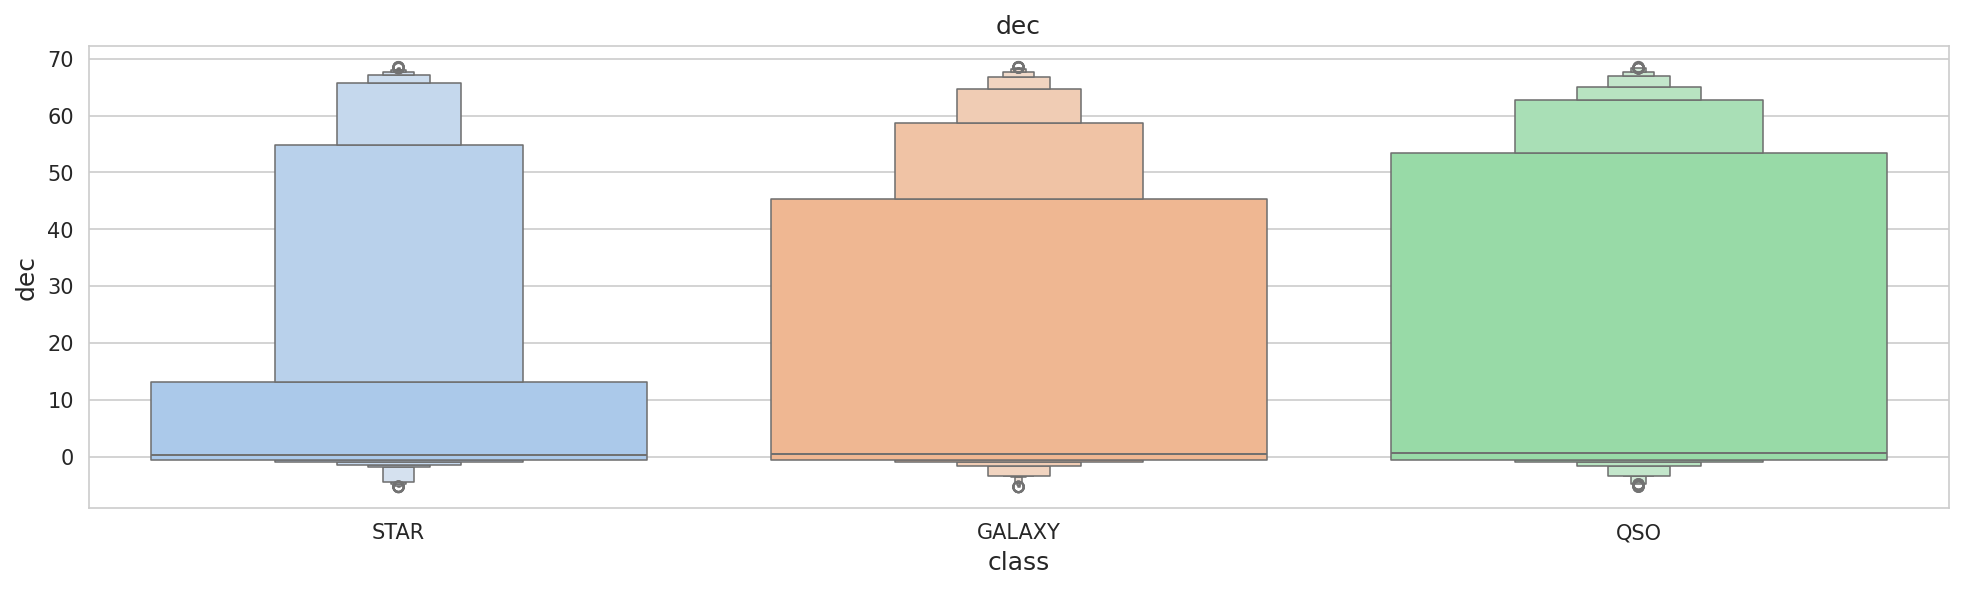

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 4))
ax = sns.boxenplot(x=sdss_df['class'], y=sdss_df['dec'], palette='pastel')
ax.set_title('dec')

**First of all: what does this plot tell us?**

The Letter value (LV) Plot show us an estimate of the distribution of the data. It shows boxes which relate to the amount of values within the range of values inside the box.

In this case we can observe a clear distinction between Stars and the other two classes. The difference between Galaxies and Quasars is smaller.

* **Star:** The largest part of the data points lay within a 0 to 10 range. Another large part consists of values between about 10 to 55. Only small amounts of the data are lower or higher than these ranges.

* **Galaxy:** The largest part of values lays between 0 and 45. There is a smaller amount of values in the range of 45 to 60. The rest of the data has smaller or higher values.

* **QSO:** This plot looks quite similiar to the GALAXY plot. Only the amount of data points in the range of 0 to 60 is even bigger.

Side Note: The fact that the distribution of dec values of galaxies und quasar objects is almost the same might indicate that one can find both galaxies and quasars at smiliar positions in the night sky.

### Multivariate Analysis

#### u,g,r,i,z filters

Recall: u, g, r, i, z represent the different wavelengths which are used to capture the observations.

Let's find out how much they are correlated.

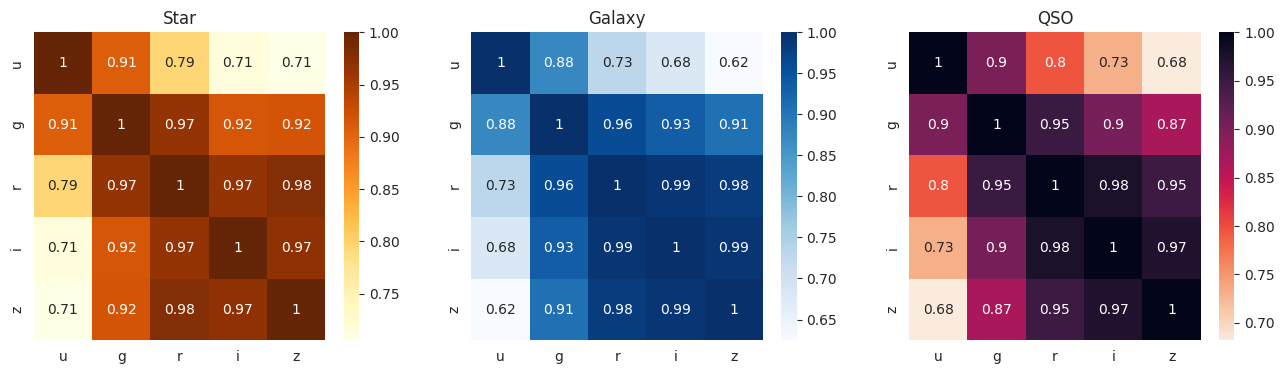

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 4))
fig.set_dpi(100)
ax = sns.heatmap(sdss_df[sdss_df['class']=='STAR'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[0], cmap='YlOrBr', annot=True)
ax.set_title('Star')
ax = sns.heatmap(sdss_df[sdss_df['class']=='GALAXY'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[1], cmap='Blues', annot=True)
ax.set_title('Galaxy')
ax = sns.heatmap(sdss_df[sdss_df['class']=='QSO'][['u', 'g', 'r', 'i', 'z']].corr(), ax = axes[2], cmap='rocket_r', annot=True)
ax = ax.set_title('QSO')

Right of the top we observe that the correlation matrices look very similiar for every class.

We can tell that there are high correlations between the different bands. This feels not really suprising - intuitively one would think that if one of the bands captures some object, the other bands should capture something aswell.

Therefore it is interesting to see that band 'u' is less correlated to the other bands.

Remember: u, g, r, i, z capture light at wavelengths of 354, 476, 628, 769 and 925 nm.

This might indicates that galaxies, stars and quasar objects shine brighter at wavelengths from 476 - 925 nm. Don't quote me on that though.

**But:** as we can see - the correlation is roughly the same for every class...the different bands behave the same for the different classes!

#### Right ascension (ra) and declination (dec)

We will now plot the right ascension versus the declination depending on the class

Text(0.5, 1.0, 'Equatorial coordinates')

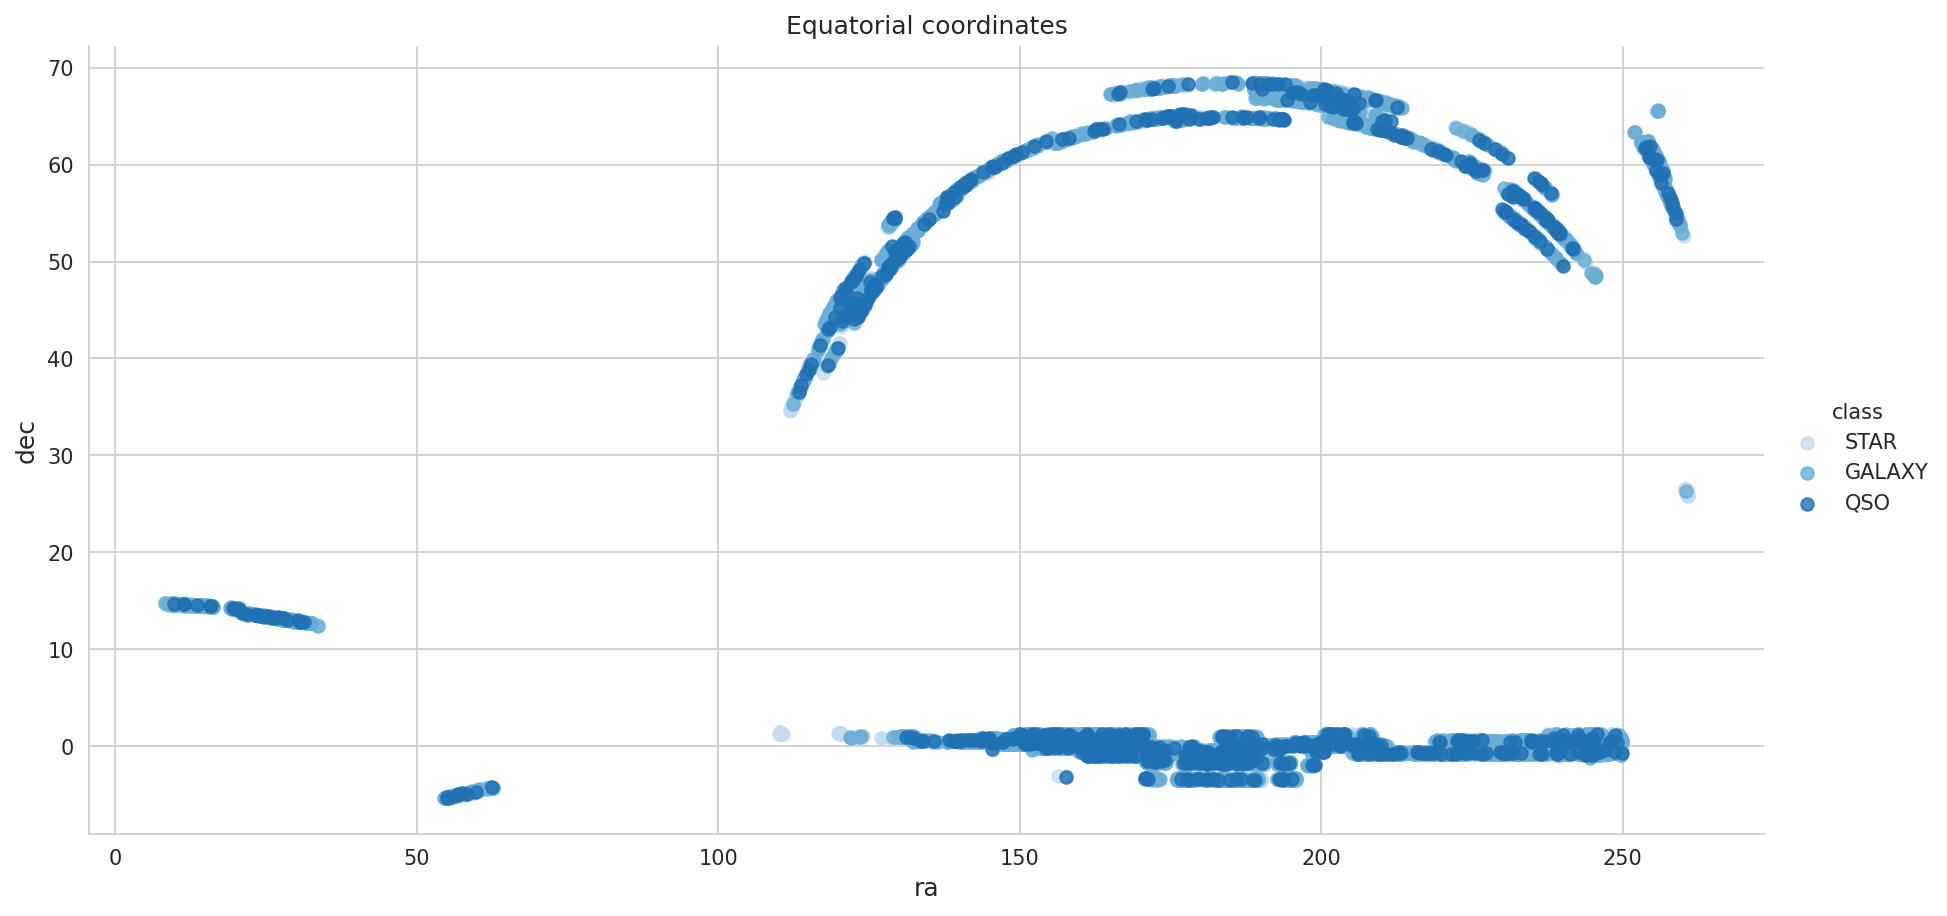

In [ ]:
sns.lmplot(x='ra', y='dec', data=sdss_df, hue='class', fit_reg=False, palette='Blues', height=6, aspect=2)
plt.title('Equatorial coordinates')

As we can clearly observe the equatorial coordinates do not differ significantly between the 3 classes. There are some outliers for stars and galaxies but for the bigger part the coordinates are within the same range.

Why is that?

All SDSS images cover the same area of the sky. The plot above tells us that stars, galaxies and quasars are observed equally at all coordinates within this area. So whereever the SDSS "looks" - the chance of observing a star or galaxy or quasar is always the same.  

**This contradicts our interpretation of the letter value plot of dec from the univariate analysis.**

## Feature Engineering

### u, g, r, i, z

We will now reduce the amount of dimensions by replacing the different bands 'u', 'g', 'r', 'i' and 'z' by a linear combination with only 3 dimensions using **Principal Component Analysis**.

**Principal Component Analysis:**

n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (--> the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing.

In [ ]:
sdss_df_fe = sdss_df

#### encode class labels to integers

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(sdss_df_fe['class'])
sdss_df_fe['class'] = y_encoded

In [ ]:
le.classes_

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

#### Principal Component Analysis

In [ ]:
pca = PCA(n_components=3)
ugriz = pca.fit_transform(sdss_df_fe[['u', 'g', 'r', 'i', 'z']])

#### show transformed vectors

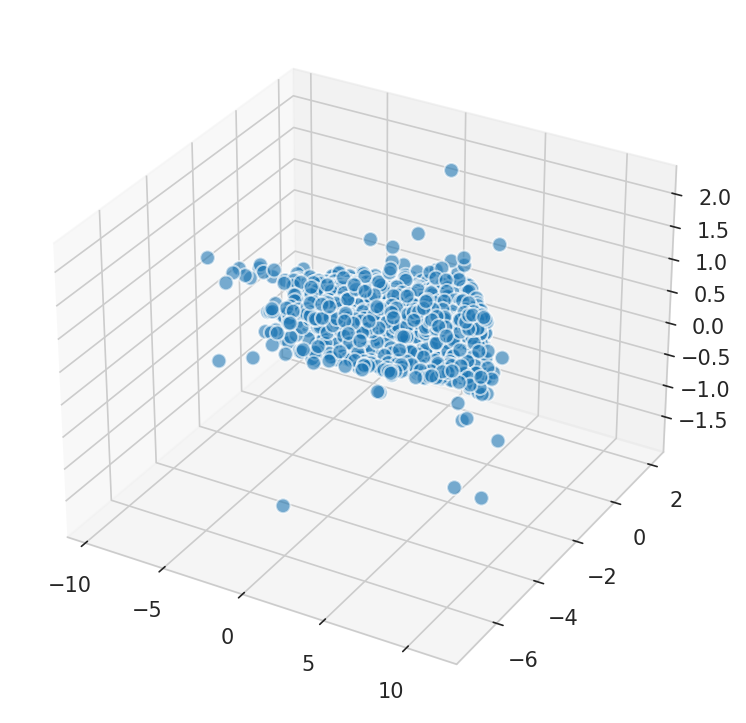

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

xs = ugriz[:,0]
ys = ugriz[:,1]
zs = ugriz[:,2]
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

plt.show()

#### update dataframe

In [ ]:
sdss_df_fe = pd.concat((sdss_df_fe, pd.DataFrame(ugriz)), axis=1)

In [ ]:
sdss_df_fe.rename({0: 'PCA_1', 1: 'PCA_2', 2: 'PCA_3'}, axis=1, inplace = True)

In [ ]:
sdss_df_fe.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)

In [ ]:
sdss_df_fe.head()

,ra,dec,class,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,1.377293,-0.265119
1,183.598370,0.135285,2,-0.000055,323,51615,541,-0.195758,0.028410,-0.155695
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297604,0.590023,0.140338
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446117,-0.566685,-0.009272
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849271,-1.287505,-0.397689


## Machine Learning Models - Training

#### Feature Scaling

We will now train different models on this dataset.

Scaling all values to be within the (0, 1) interval will reduce the distortion due to exceptionally high values and make some algorithms converge faster.

In [ ]:
scaler = MinMaxScaler()

In [ ]:
sdss = scaler.fit_transform(sdss_df_fe.drop('class', axis=1))

We will  split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [ ]:
RANDOM_STATE = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sdss, sdss_df_fe['class'], test_size=0.33,
                                                    stratify=sdss_df_fe['class'], random_state=RANDOM_STATE)

In [ ]:
pd.concat([y_train.value_counts()/y_train.shape[0], y_test.value_counts()/y_test.shape[0]], axis=1, keys=['train', 'test'])

,train,test
class,,
0,0.499851,0.499697
2,0.415224,0.415152
1,0.084925,0.085152


#### Naive Bayes

Naive Bayes assumes the data to be normally distributed which can be achieved by scaling using the MaxAbsScaler. Many thanks!

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
scaler_gnb = MaxAbsScaler()

In [ ]:
sdss_nb = scaler_gnb.fit_transform(sdss_df_fe.drop('class', axis=1))

In [ ]:
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss_nb, sdss_df_fe['class'],
                                                                    test_size=0.33,
                                                                    stratify=sdss_df_fe['class'],
                                                                   random_state=RANDOM_STATE)

In [ ]:
gnb = GaussianNB()

training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()

acc_gnb = (preds == y_test_gnb).sum().astype(float) / len(preds)*100

gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start

print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 97.39
Time consumed for training: 0.007 seconds
Time consumed for prediction: 0.00291 seconds


#### XGBoost

In [ ]:
xgb = XGBClassifier(n_estimators=100)

training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()

acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100

xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start

print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 99.00
Time consumed for training: 0.722
Time consumed for prediction: 0.01460 seconds


#### Scitkit-Learn's Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10)

training_start = time.perf_counter()
rfc.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = rfc.predict(X_test)
prediction_end = time.perf_counter()

acc_rfc = (preds == y_test).sum().astype(float) / len(preds)*100

rfc_train_time = training_end-training_start
rfc_prediction_time = prediction_end-prediction_start

print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc_rfc))
print("Time consumed for training: %4.3f seconds" % (rfc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (rfc_prediction_time))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 98.91
Time consumed for training: 0.169 seconds
Time consumed for prediction: 0.00458 seconds


#### Support Vector Machine Classifier

In [ ]:
svc = SVC(gamma='auto', C=1000)

training_start = time.perf_counter()
svc.fit(X_train, y_train)
training_end = time.perf_counter()

prediction_start = time.perf_counter()
preds = svc.predict(X_test)
prediction_end = time.perf_counter()

acc_svc = (preds == y_test).sum().astype(float) / len(preds)*100

svc_train_time = training_end-training_start
svc_prediction_time = prediction_end-prediction_start

print("Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: %3.2f" % (acc_svc))
print("Time consumed for training: %4.3f seconds" % (svc_train_time))
print("Time consumed for prediction: %6.5f seconds" % (svc_prediction_time))

Scikit-Learn's Support Vector Machine Classifier's prediction accuracy is: 98.06
Time consumed for training: 0.682 seconds
Time consumed for prediction: 0.12547 seconds


Let's compare the results. We will create a table for a more comprehensive overview.

In [ ]:
results = pd.DataFrame({
    'Model': ['Naive Bayes',
              'XGBoost', 'Random Forest', 'SVC'],
    'Score': [acc_gnb, acc_xgb, acc_rfc, acc_svc],
    'Runtime Training': [gnb_train_time, xgb_train_time, rfc_train_time,
                         svc_train_time],
    'Runtime Prediction': [gnb_prediction_time, xgb_prediction_time, rfc_prediction_time,
                          svc_prediction_time]})

In [ ]:
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')

In [ ]:
result_df

,Score,Runtime Training,Runtime Prediction
Model,,,
XGBoost,99.000000,0.722090,0.014599
Random Forest,98.909091,0.168720,0.004583
SVC,98.060606,0.681557,0.125470
Naive Bayes,97.393939,0.007163,0.002906


We can see that both XGBoost and Scikit-Learn's Random Forest Classifier could achieve very high accuracy.

Gaussian Naive Bayes achieves just a little less accuracy but needs a very little amount of time to both train and predict data.

The Support Vector Machine Classifier has the worst accuracy, plus takes the most of time for its operations.

### K Fold Cross Validation

We will now perform k fold cross validation for the top 2 classifiers, i.e. XGBoost & Random Forest.

We do this to get a more realistic result by testing the performance for 10 different train and test datasets and averaging the results.

Cross validation ensures that the above result is not arbitrary and gives a more reliable performance check.

#### Scikit-Learn's Random Forest Classifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
rfc_cv = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rfc_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99104478 0.99552239 0.99104478 0.99552239 0.99552239 0.99104478
 0.99104478 0.99253731 0.98955224 0.99552239]
Mean: 0.9928358208955224
Standard Deviation: 0.0022928793277219787


#### XGBoost

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99253731 0.99253731 0.99552239 0.99701493 0.99701493 0.99104478
 0.98955224 0.99402985 0.98955224 0.99701493]
Mean: 0.9935820895522388
Standard Deviation: 0.002835820895522393


Cross validating the models showed that the accuracy values were in fact not arbitary and proofed that both models are performing very well.

**Mean** corresponds to a stable performance and a **standard deviation** corresponds to range of results (scores).
The higher the mean and the lower the standard deviation the better is our model.

### Feature Importance

Decision Trees have the unique property of being able to order features by their ability to split between the classes.

We will now visualize the features and their splitting ability.

In [ ]:
importances = pd.DataFrame({
    'Feature': sdss_df_fe.drop('class', axis=1).columns,
    'Importance': xgb.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=True)
importances = importances.set_index('Feature')
importances

,Importance
Feature,
mjd,0.003226
dec,0.004128
ra,0.005292
PCA_2,0.006162
fiberid,0.006458
plate,0.007661
PCA_1,0.007849
PCA_3,0.018136
redshift,0.941086


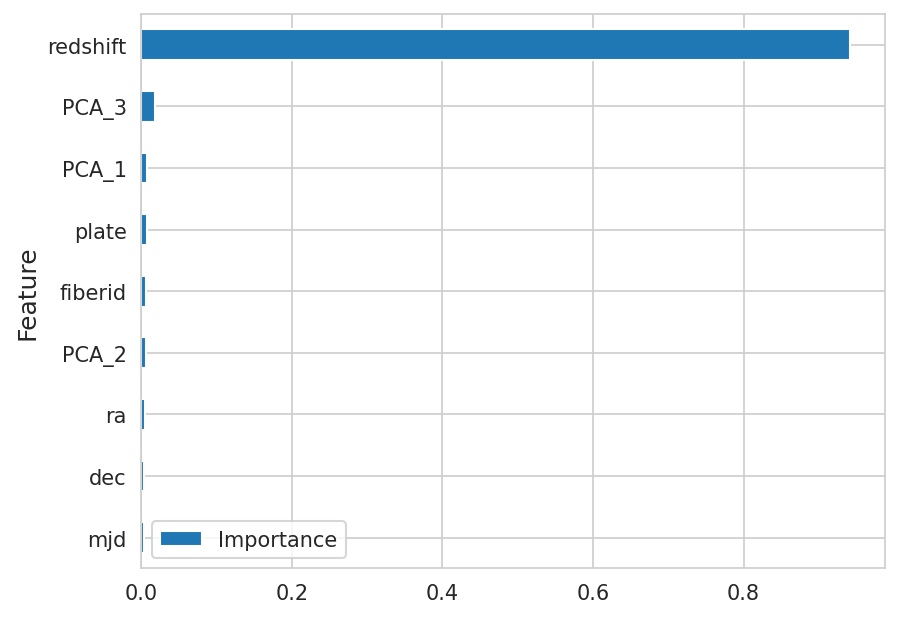

In [ ]:
importances.plot.barh();

Here we can clearly see how PCA helped to improve the performance of our predictors as 2 of the principal components are in the top 3 features.

The best (in terms of being able to split classes) is redshift.

Let's drop the column from the dataframe and rescale it. Since XGBoost requires the class to be discrete, we will re-add it manually afterwards.

### We can drop non-important features here

let's drop lats two features `ra` and `dec`

In [ ]:
scaler = MinMaxScaler()

In [ ]:
remove_cols = ['ra', 'dec']

In [ ]:
sdss = pd.DataFrame(scaler.fit_transform(sdss_df_fe.drop(remove_cols + ['class'], axis=1)), columns=sdss_df_fe.drop(remove_cols + ['class'], axis=1).columns)
sdss['class'] = sdss_df_fe['class']

In [ ]:
sdss.head()

,redshift,plate,mjd,fiberid,PCA_1,PCA_2,PCA_3,class
0,0.000770,0.373281,0.566492,0.490490,0.385886,0.930652,0.387685,2
1,0.000762,0.006999,0.006268,0.540541,0.448110,0.784736,0.415556,2
2,0.023749,0.002579,0.075385,0.512513,0.518964,0.845489,0.490959,0
3,0.000751,0.373281,0.566492,0.509510,0.388785,0.720362,0.452852,2
4,0.000882,0.373281,0.566492,0.511512,0.417103,0.642387,0.353918,2


### Summary

We trained different machine learning models to solve this classification problems. Without any further hyperparameter tuning XGBoost and Scikit-Learn's Random Forest Classifier performed the best.

As XGBoost showed a little higher accuracy in most of the tests, we will continue only with this classifier.

## XGBoost - Finding the best hyperparameters

Now it's time to look for the optimal hyperparameters - what does this mean?

We will test our chosen model with different values for (almost) each of its tuning parameters and give back the parameters with which the model performed best.

The best parameters for prediction as found by the tuning tests are:

- max_depth = 5
- min_child_weight = 1
- gamma = 0
- subsample = 0.8
- colsample_bytree = 0.8
- reg_alpha = 0.005

## XGBoost - Testing optimal hyperparameters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sdss.drop('class', axis=1), sdss['class'],
                                                   test_size=0.33,
                                                    stratify=sdss['class'],
                                                    random_state=RANDOM_STATE
                                                   )

In [ ]:
xgboost = XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

In [ ]:
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
preds = xgboost.predict(X_test)

In [ ]:
accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 98.94


The parameter tuning did not improve the accuracy as excpected. We will therefore do a cross validation to test to get a more reliable result.

In [ ]:
xgb_cv = XGBClassifier(n_estimators=100)

In [ ]:
scores = cross_val_score(xgb_cv, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.99253731 0.99402985 0.99701493 0.99552239 0.99701493 0.99104478
 0.99104478 0.99253731 0.98955224 0.99701493]
Mean: 0.993731343283582
Standard Deviation: 0.002653192363377784


Depending on the run the cross validation results vary from a little lower and a little better than before.

This indicates that the parameter tuning was not as effective as expected - this could mean that XGBoost was actually close to its maximum performance capability on this data set.

As we still have a good performance we will now continue with further evaluation of the performance of our model!

## XGBoost - Evaluation

### Confusion Matrix

In [ ]:
unique, counts = np.unique(sdss['class'], return_counts=True)
dict(zip(unique, counts))

{0: 4998, 1: 850, 2: 4152}

In [ ]:
predictions = cross_val_predict(xgb, sdss.drop('class', axis=1), sdss['class'], cv=3)
confusion_matrix(sdss['class'], predictions)

array([[4956,   22,   20],
       [  31,  818,    1],
       [   9,    0, 4143]])

The first row shows that out of 4998 stars, **4964 were classified correctly as stars**. 26 stars were classified incorrectly as galaxies and 8 stars were classified incorrectly as quasars.

The second row shows out of 850 quasars **826 were classified correctly**. 23 quasars were classified incorrectly as stars and 1 quasar was classified as galaxy.

The last row tells us that out of 4152 galaxies **4146 were classified correctly.**. 6 galaxies were classified incorrectly as star.

In total:

We have only 64 objects which were classified incorrectly. Most of the objects were recognized as what they are.

### Precision & Recall

In [ ]:
print("Precision:", precision_score(sdss['class'], predictions, average='micro'))
print("Recall:",recall_score(sdss['class'], predictions, average='micro'))

Precision: 0.9917
Recall: 0.9917


In [ ]:
print("Precision:", precision_score(sdss['class'], predictions, average='macro'))
print("Recall:",recall_score(sdss['class'], predictions, average='macro'))

Precision: 0.9869199636732394
Recall: 0.9839273165913763


Precision is the fraction of events where the algorithm classified an object of type **t** correctly out of all occurences of the algorithm classifying objects of type **t**.

Recall is the fraction of events where the algorithm classified an object of type **t** correctly when the true type of that object was actually **t**.

Precision in our case:

For every class its calculated how many objects were classified as stars (or galaxies or quasars) in relation to the amount of correct star (or galaxies or quasars) predictions. The results are averaged --> 99.36%.

Recall in our case:

For every class its calculated how many objects were classified as stars (or galaxies or quasars) in relation to the total amount of predictions where the object actually was a star (or galaxy or quasar). The results are averaged --> 99.36%.

In both cases our algorithm did a very good job. The highest precision or recall value a predictor can have is 1.0.

### F1-Score

One can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [ ]:
print("F1-Score:", f1_score(sdss['class'], predictions, average='micro'))

F1-Score: 0.9917


In [ ]:
print("F1-Score:", f1_score(sdss['class'], predictions, average='macro'))

F1-Score: 0.9854116369056102


As precision and recall have the same value the F1-Score has automatically the same value too. Again, we are very close to 1.0 which indicates strong performance.

### Decision tree classifier -

1. ID3 → (extension of D3)

2. C4.5 → (successor of ID3)

3. CART → (Classification And Regression Tree)

4. CHAID → (Chi-square automatic interaction detection Performs multi-level splits when computing classification trees)

5. MARS → (multivariate adaptive regression splines)


In [ ]:
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

### Linear regression classifier -

In [ ]:
#Linear Classifier - Logistic Regression
LRClassifer = LogisticRegression()

### KNN classifier -

In [ ]:
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
#Fitting the models to the dataset
dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [ ]:
print(y_preds[:10],'\n',y_test[:10])

print("\n-------------------------------------------------------")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n-------------------------------------------------------")
print(y_predsNeNe[:10],'\n',y_test[:10])

[2 0 2 0 2 0 2 2 2 0] 
 225     2
30      0
8095    2
3762    0
8668    2
6248    0
1675    2
1243    2
7829    2
2292    0
Name: class, dtype: int64

-------------------------------------------------------
[2 0 2 0 2 0 2 2 2 0] 
 225     2
30      0
8095    2
3762    0
8668    2
6248    0
1675    2
1243    2
7829    2
2292    0
Name: class, dtype: int64

-------------------------------------------------------
[2 0 2 0 2 0 2 2 2 0] 
 225     2
30      0
8095    2
3762    0
8668    2
6248    0
1675    2
1243    2
7829    2
2292    0
Name: class, dtype: int64


### Classification Report

In [ ]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1640
           1       0.96      0.95      0.96       284
           2       1.00      0.99      1.00      1376

    accuracy                           0.99      3300
   macro avg       0.98      0.98      0.98      3300
weighted avg       0.99      0.99      0.99      3300


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.95      0.89      0.92      1752
           1       0.76      1.00      0.86       214
           2       0.90      0.93      0.91      1334

    accuracy                           0.91      3300
   macro avg       0.87      0.94      0.90      3300
weighted avg       0.92      0.91      0.91      3300


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.95      0.95      0.95      1650
           1       0.90      0.98      0.94       259
     